In [12]:
# libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation , Dropout

import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import img_to_array, load_img



In [13]:
train_path = "train.csv"
test_path = "test.csv"

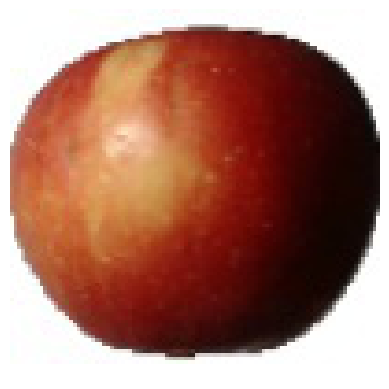

(100, 100, 3)


In [14]:
img = load_img(train_path + "Apple Braeburn 1/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

x = img_to_array(img)
print(x.shape)

In [15]:
className = glob(train_path + "/*")
numberOfClass = len(className)
print("NumberOfClass : ",numberOfClass)


NumberOfClass :  141


In [16]:

#%% CNN MODEL
#MaxPooling2D(): Özellik haritalarını küçültür ve hesaplama yükünü azaltır.
#Flatten(): Çok boyutlu verileri tek boyutlu hale getirir.
#Dense(1024): 1024 nöronlu bir tam bağlantılı katman ekler; modelin karmaşık ilişkileri
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())


model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))
model.add(Activation("softmax"))


model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
             metrics="accuracy")

In [17]:
batch_size = 32

#%% CNN MODEL   data deneration - train - test
# Derin öğrenme için meyve başı 400 resim az bu yüzden
# ImageDataGenerator, görüntü verilerini artırmak için kullanılır ve modelin genelleme yeteneğini artırır.
train_datagen = ImageDataGenerator(rescale=1./255,
                   shear_range=0.3,  # resimleri belirli açıyla çeviriyor
                   horizontal_flip=True,   # resimleri random sağa sola çeviricek 
                   zoom_range=0.3)      # Görüntüleri rastgele büyütme (zoom) işlemi yapar.


test_datagen = ImageDataGenerator(rescale=1./255) 

# flow from directory : Resim verilerini otomatik olarak bir klasör yapısından okur ve etiketler.
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=x.shape[:2],
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=x.shape[:2],
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

hist = model.fit_generator(generator=train_generator,
                    steps_per_epoch=1600 // batch_size,    # Eğitim verisi
                    epochs=30,
                    validation_data=test_generator,        # Test verisi
                    validation_steps=800 // batch_size)
 # validation_data=test_generator: Modelin her epoch sonunda doğrulama 
 # (validation) için kullanılacak veri kümesini temsil eder. test_generator, test verilerini sağlar.
 


# steps_per_epoch=1600 // batch_size: Bu, her epoch (dönem) içinde modelin kaç adım (batch) gerçekleştireceğini belirler. 
# Örneğin, toplam 1600 eğitim örneğiniz varsa ve batch_size 32 ise, her adımda 32 örnek kullanılır. 1600 // 32 işlemi 50 eder, 
# yani model her epoch'ta 50 adım atar. Bu, modelin eğitimi sırasında kaç kez güncelleneceğini gösterir.

# validation_steps=800 // batch_size: Bu, doğrulama verileri için kaç adım (batch) yapılacağını belirler. Örneğin, toplam 800 doğrulama 
# örneğiniz varsa ve batch_size 32 ise, 800 // 32 işlemi 25 eder. Bu, her doğrulama aşamasında 25 adım yapılacağını gösterir
# Modelin her epoch sonunda doğrulama verisi üzerindeki performansını değerlendirmek için kullanılır



Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.
Epoch 1/30


C:\Users\gokay\AppData\Local\Temp\ipykernel_4580\3484584266.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_generator,


50/50 [==============================] - 10s 185ms/step - loss: 4.7999 - accuracy: 0.0331 - val_loss: 4.3929 - val_accuracy: 0.0388
Epoch 2/30
50/50 [==============================] - 9s 175ms/step - loss: 4.0318 - accuracy: 0.0819 - val_loss: 3.4762 - val_accuracy: 0.1513
Epoch 3/30
50/50 [==============================] - 9s 180ms/step - loss: 3.2799 - accuracy: 0.1781 - val_loss: 2.6437 - val_accuracy: 0.3212
Epoch 4/30
50/50 [==============================] - 9s 176ms/step - loss: 2.7010 - accuracy: 0.2612 - val_loss: 2.0079 - val_accuracy: 0.4888
Epoch 5/30
50/50 [==============================] - 9s 175ms/step - loss: 2.2131 - accuracy: 0.3600 - val_loss: 1.7557 - val_accuracy: 0.5437
Epoch 6/30
50/50 [==============================] - 9s 172ms/step - loss: 1.9104 - accuracy: 0.4412 - val_loss: 1.3795 - val_accuracy: 0.6062
Epoch 7/30
50/50 [==============================] - 9s 174ms/step - loss: 1.6232 - accuracy: 0.5131 - val_loss: 1.1034 - val_accuracy: 0.6825
Epoch 8/30
50/50

In [18]:
#%%  save
import h5py
model.save_weights("deneme.h5")
  # sonuçları kaydetme
# Modelin mevcut durumunu (eğitimden sonra elde edilen ağırlıkları) 
# saklamak ve gerektiğinde yeniden yüklemek.
#%%  model evulation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


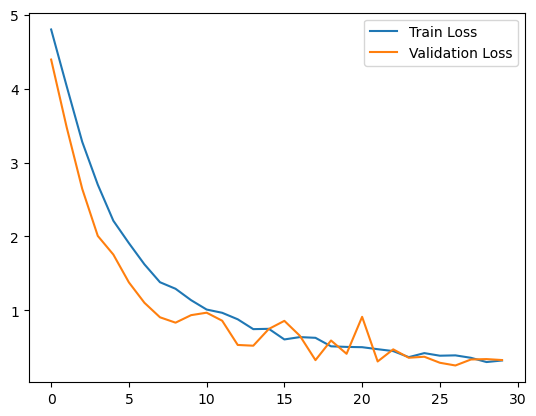

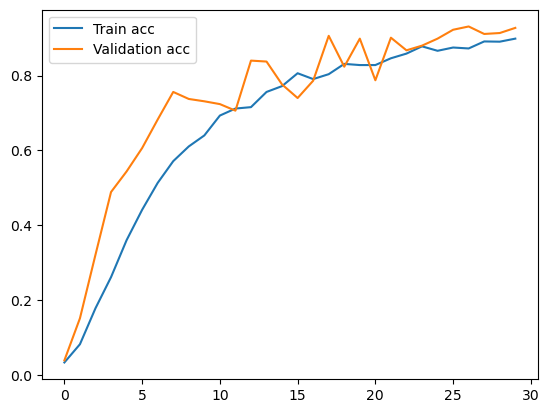

In [19]:

print(hist.history.keys())
plt.plot(hist.history["loss"],label="Train Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

plt.plot(hist.history["accuracy"],label="Train acc")
plt.plot(hist.history["val_accuracy"],label="Validation acc")
plt.legend()
plt.show()


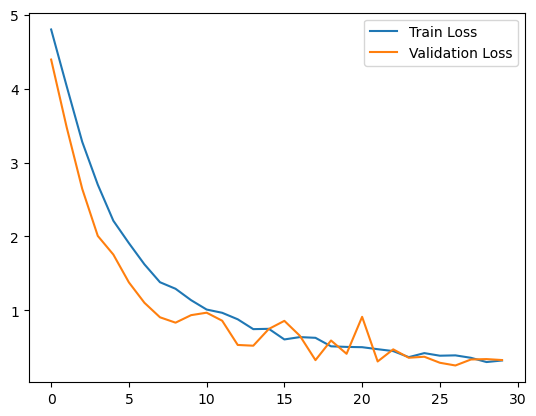

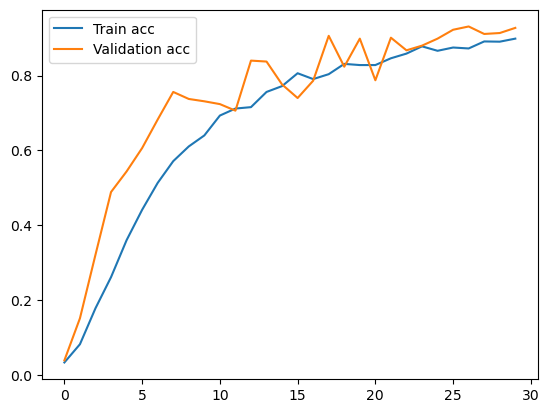

In [20]:

#%%  SAVE HİSTORY  KAYDETTİĞİMİZ VERİLERİ KULLANMA

import json 
with open("cnn_fruit_hist.json","w") as f:
    json.dump(hist.history,f)
# Eğitim sürecini analiz etmek veya daha sonra tekrar gözden geçirmek
# için geçmiş verileri saklamak.


#%% LOAD HİSTORY
import codecs
with codecs.open("cnn_fruit_hist.json","r",encoding="utf-8") as f:
    h = json.loads(f.read())
    
plt.plot(h["loss"],label="Train Loss")
plt.plot(h["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

plt.plot(h["accuracy"],label="Train acc")
plt.plot(h["val_accuracy"],label="Validation acc")
plt.legend()
plt.show()